In [1]:
# import importan labs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True)



In [2]:
#read data 
df = pd.read_csv('train.csv')

In [3]:
# show  five element 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# show columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# information about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## notes * clean 
* Age have null values ==177
* PassengerId  rom int to  string
* Survived categoral (0 , 1)1 for survived, 0 for deceased
* Pclass  from int to categoral 
* Sex from obj to cat
* SibSp   int64  
* Parch   int64 
* Ticket   object
* Fare     float64
* Cabin      object  null -> 687
* Embarked   object -> cat


In [6]:
# copy the data
df_copy = df.copy()

In [7]:
# change some col to dtype cat
df_copy['Pclass']= df_copy['Pclass'].astype('category')
# df_copy['SibSp']= df_copy['SibSp'].astype('category')
# df_copy['Parch']= df_copy['Parch'].astype('category')
df_copy['Cabin']= df_copy['Cabin'].astype('category')
df_copy['Embarked']= df_copy['Embarked'].astype('category')

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null category
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null category
Embarked       889 non-null category
dtypes: category(3), float64(2), int64(4), object(3)
memory usage: 72.6+ KB


In [9]:
# df_copy['Cabin'].unique().tolist()

In [10]:
#replace male to 0 , femal to 1

df_copy['Sex_cat'] =df_copy['Sex']
df_copy['Sex_cat'].replace('male',0,inplace=True)
df_copy['Sex_cat'].replace('female',1,inplace=True)

print('list of sex_category',df_copy['Sex_cat'].unique().tolist())

#convert int to category
df_copy['Sex_cat']= df_copy['Sex_cat'].astype('category')


list of sex_category [0, 1]


In [11]:
#covert PassengerId to str
df_copy['PassengerId']= df_copy['PassengerId'].astype('str')


In [12]:
#convert Survived to cate 
# df_copy['Survived']= df_copy['Survived'].astype('category')


In [13]:
df_copy.describe()

,Survived,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,29.699118,0.523008,0.381594,32.204208
std,0.486592,14.526497,1.102743,0.806057,49.693429
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df_copy.describe(include=['category'])

,Pclass,Cabin,Embarked,Sex_cat
count,891,204,889,891
unique,3,147,3,2
top,3,B96 B98,S,0
freq,491,4,644,577


In [15]:
#Discrete variables
df_copy['FamilySize'] = df_copy ['SibSp'] + df_copy['Parch'] + 1


In [16]:
# to yes/1 is alone
df_copy['IsAlone'] = 1
# now update to no/0 if family size is greater than 1
# alone = 1 , family =0
df_copy['IsAlone'].loc[df_copy['FamilySize'] > 1] = 0  


/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
df_copy['IsAlone'].unique().tolist()

[0, 1]

In [18]:
df_copy['IsAlone'].replace(1,'alone',inplace=True)
df_copy['IsAlone'].replace(0,'family',inplace=True)

df_copy['IsAlone']= df_copy['IsAlone'].astype('category')


/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


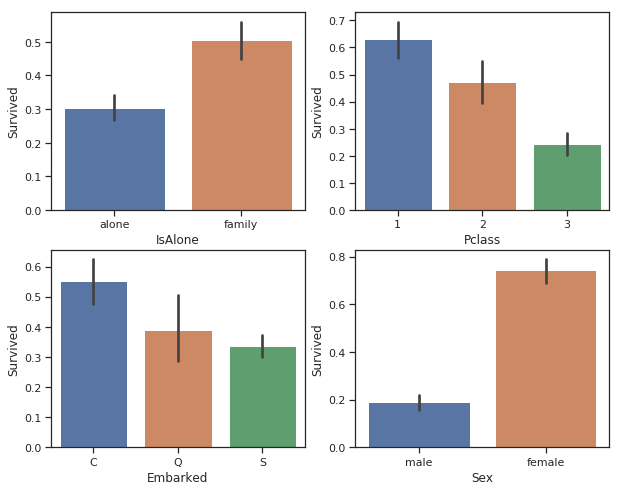

In [19]:
fig, saxis = plt.subplots(2, 2,figsize=(10,8))

sns.barplot(x="IsAlone", y="Survived", data=df_copy,ax = saxis[0,0]);
sns.barplot(x="Pclass", y="Survived", data=df_copy,ax = saxis[0,1]);
sns.barplot(x="Embarked", y="Survived", data=df_copy,ax = saxis[1,0]);
sns.barplot(x="Sex", y="Survived", data=df_copy,ax = saxis[1,1]);



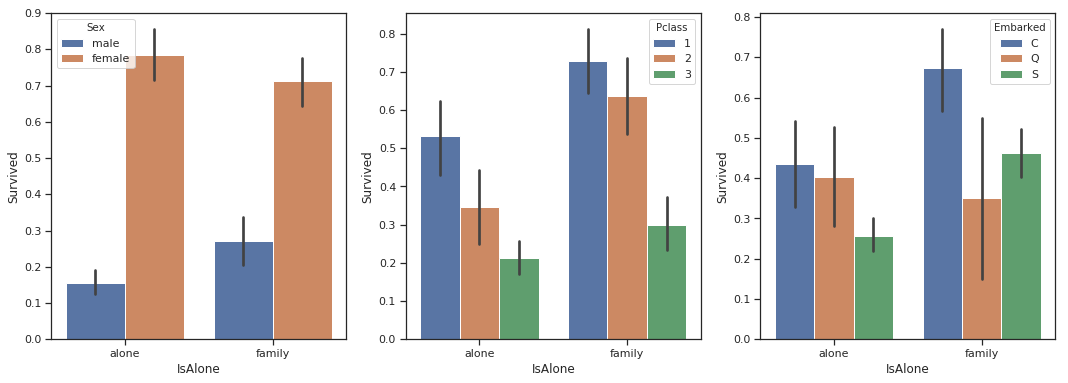

In [20]:
fig, qaxis = plt.subplots(1,3,figsize=(18,6))

sns.barplot(x="IsAlone", y="Survived",hue='Sex', data=df_copy,ax = qaxis[0]);
sns.barplot(x="IsAlone", y="Survived",hue='Pclass', data=df_copy,ax = qaxis[1]);
sns.barplot(x="IsAlone", y="Survived",hue='Embarked',data=df_copy,ax = qaxis[2]);



In [21]:
df_copy['surname']=df_copy['Name']
# df_copy['surname']=df_copy['surname'].str.replace('.',',')
surname= df_copy['surname'].str.split(',', expand=True, n=2)
# surname0= df_copy['surname'].str.split('.', expand=True, n=2)

df_copy['surname']=surname[1]
surname1= df_copy['surname'].str.split('.', expand=True, n=2)
df_copy['surname']=surname1[0]
df_copy['surname'].head()

df_copy['surname'].unique().tolist()

[' Mr',
 ' Mrs',
 ' Miss',
 ' Master',
 ' Don',
 ' Rev',
 ' Dr',
 ' Mme',
 ' Ms',
 ' Major',
 ' Lady',
 ' Sir',
 ' Mlle',
 ' Col',
 ' Capt',
 ' the Countess',
 ' Jonkheer']

In [22]:
# df_copy['surname']=df_copy['surname'].astype('category')

In [23]:
#fill the null value with mean...
# mean = df_copy['Age'].mean()
# df_copy['Age'].fillna(mean,inplace=True)
# df_copy['Age'].astype(int)
